# **Modelling And Evaluating**

## Objectives
* engineer features for modelling and Evaluating

## Inputs

*  The input data, already cleaned and divided into test/train/validating found in:
    * /workspace/mildew-detection/inputs/mildew_dataset/cherry-leaves 
### **Grayscale**
* Same Data but grayscale
    * /workspace/mildew-detection/inputs/mildew_dataset/gray_images
 
## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* I chose to have one rgb and one grayscale to se wich one that gives the best resault



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection'

# Downloading neccessary packages

Packages:

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import joblib


---

# Setting up the path for train/test/validation

In [7]:
my_data_dir = "inputs/mildew_dataset/cherry-leaves"
train_path = my_data_dir + "/" + "train"
test_path = my_data_dir + "/" + "test"
val_path = my_data_dir + "/" + "validation"

my_data_dir_gray = "inputs/mildew_dataset/gray_images"
train_path_gray = my_data_dir_gray + "/" + "train"
test_path_gray = my_data_dir_gray + "/" + "test"
val_path_gray = my_data_dir_gray + "/" + "validation"

Setting the output for images and other relevant data

In [8]:
version = "v1"
version_two = "v2"
file_path_one = f'output/{version}'
file_path_two = f'output/{version_two}'

# creating output for the rgb images
if "output" in os.listdir(current_dir) and version in os.listdir(current_dir + "/output"):
    print("make a new version")
    pass
else:
    os.makedirs(name=file_path_one)
# creating output for the gray scale images
if "output" in os.listdir(current_dir) and version_two in os.listdir(current_dir + "/output"):
    print("make a new version")
    pass
else:
    os.makedirs(name=file_path_two)

make a new version
make a new version


setting the lable variable

* for RGB images

In [115]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


* for grascale images

In [10]:
labels_gray = os.listdir(train_path_gray)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


In [116]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"output/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

Visualisation of the amount of images in the dataset

* Showing the amount of images in Dataset to get a better understanding of the Dataset
    * Showing with a barplot
    * image augumentation for better model training


---

### **Doing this only on RGB because its the same dataset and the numbers won't be different**

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




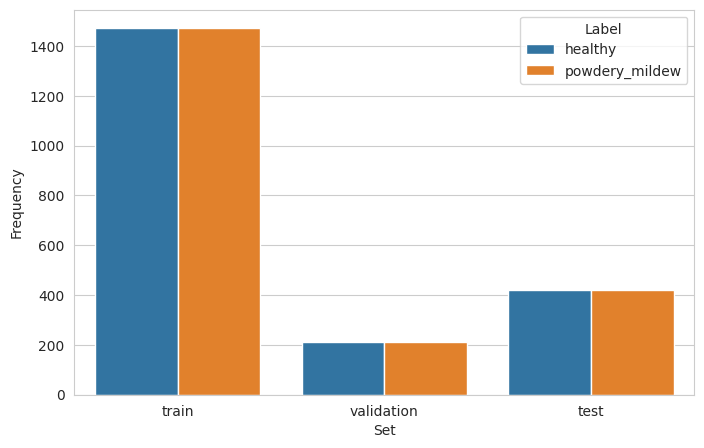

In [111]:

df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path_one}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

Generating images from current images using image agumantation from Tensorflow
* importing neccessary packages for the task 

In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [113]:
augmented_image_data = ImageDataGenerator(rotation_range=25,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

Augumentation for RGB train set

In [119]:
batch_size = 25  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augumentation for RGB test set

In [ ]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Augumentation for RGB validation set

In [ ]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Plot the augumented Images for Test/train/validation set

* Train set

(25, 256, 256, 1)


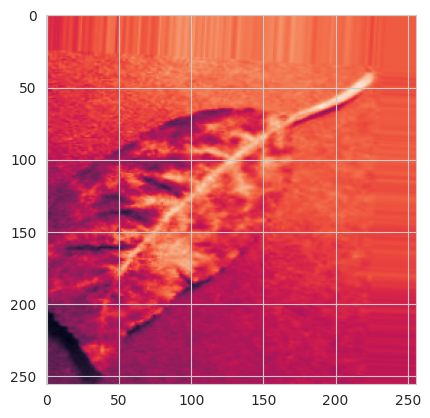

(25, 256, 256, 1)


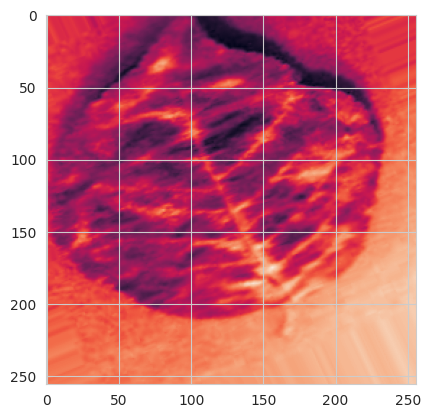

(25, 256, 256, 1)


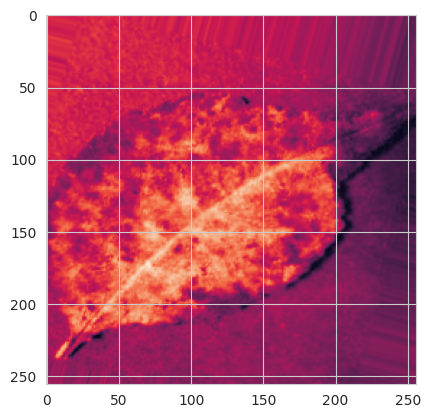

In [118]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

* Test set

In [ ]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

* Validation set

In [ ]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

## Saving the train set indices in "v1"
   * As an pickle file

In [ ]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path_one}/class_indices.pkl")

---

## **Creating The Model**

---

Import neccessary packages for ML

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import initializers

* Creating the model

In [ ]:
def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=32, kernel_size=(3, 3), kernel_initializer=initializers.GlorotUniform(seed=None),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer=initializers.GlorotUniform(seed=None),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

* **Summary of the model**

In [ ]:
create_tf_model().summary()

## Implementing early stopping to reduce risk of overfitting

* starting of with patience=3, as its near 10% of 25 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### **Fit Model for Model training**

In [ ]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

* Saving the model

In [ ]:
model.save('output/v1/mildew_detection_model.h5')


---

### **Learning curve**
* Based on the model from above

In [ ]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path_one}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path_one}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

## Loading the model to test it against the the test images

---

* **Load Model**

In [ ]:
from keras.models import load_model
model = load_model('output/v1/mildew_detection_model.h5')

* Put the test file against the model

In [ ]:
evaluation = model.evaluate(test_set)

In [ ]:
joblib.dump(value=evaluation,
            filename=f"output/v1/evaluation.pkl")

* Prediction on unseen data

In [ ]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]  # select Uninfected or Parasitised

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

* Turning the picture into an array

In [ ]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

* Predicting the unseen data (healthy)

In [ ]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

* testing again with unseen image (mildew infected)

In [ ]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[1]  # select Uninfected or Parasitised

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

In [ ]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

In [ ]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

---

## Doing the same steps from above but for grayscale images

* Image shape for grayscale image set
* Image augmentation

---

**fetch and save image shape (grayscale)**

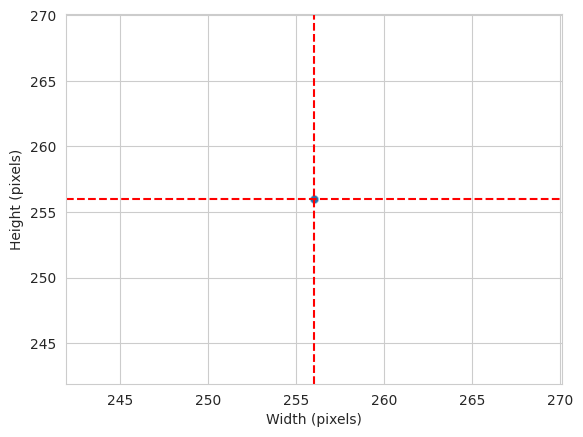

Width average: 256 
Height average: 256


In [13]:
dim1, dim2 = [], []
for label in labels_gray:
    for image_filename in os.listdir(train_path_gray + '/' + label):
        img = imread(train_path_gray + '/' + label + '/' + image_filename)
        d1, d2 = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

* Setting the image shape (height, width, 1) to image_shape_gray variable

In [14]:
image_shape_gray = (dim1_mean, dim2_mean, 1)

* Saving the shape with joblib into "v2" output

In [18]:
joblib.dump(value=image_shape_gray, filename=f"{file_path_two}/image_shape_gray.pkl")

['output/v2/image_shape_gray.pkl']

### **Data augmentation for each data set**

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [70]:
augmented_image_data_gray = ImageDataGenerator(rotation_range=25,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                 zoom_range=0.1,
                 horizontal_flip=True,
                 vertical_flip=True,
                 fill_mode='nearest', 
                 rescale=1./255
                 )


* Train set

In [107]:
batch_size = 25  # Set batch size
train_set_gray = augmented_image_data_gray.flow_from_directory(train_path_gray,
                                                     target_size=image_shape_gray[:2],
                                                     color_mode="grayscale",
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set_gray.class_indices

Found 2944 images belonging to 2 classes.


{'healthy-gray': 0, 'powdery_mildew-gray': 1}

* validation set

In [110]:
validation_set_gray = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path_gray,
                                                                        target_size=image_shape_gray[:2],
                                                                        batch_size=batch_size,
                                                                        color_mode="grayscale",
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set_gray.class_indices

Found 420 images belonging to 2 classes.


{'healthy-gray': 0, 'powdery_mildew-gray': 1}

* test set

In [120]:
test_set_gray = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path_gray,
                                                                  target_size=image_shape_gray[:2],
                                                                  batch_size=batch_size,
                                                                  color_mode="grayscale",
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set_gray.class_indices

Found 844 images belonging to 2 classes.


{'healthy-gray': 0, 'powdery_mildew-gray': 1}

**Plot the augmented Images for Test/train/validation set**

* Train set

(25, 256, 256, 1)


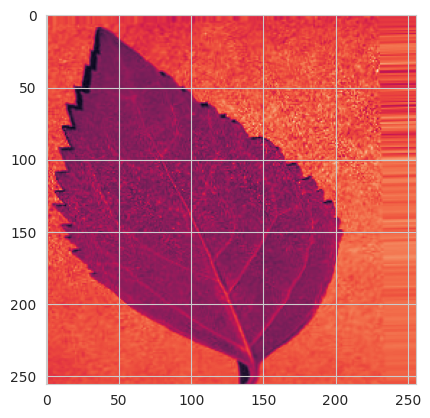

(25, 256, 256, 1)


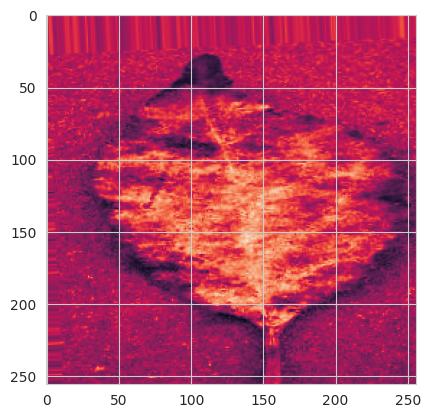

(25, 256, 256, 1)


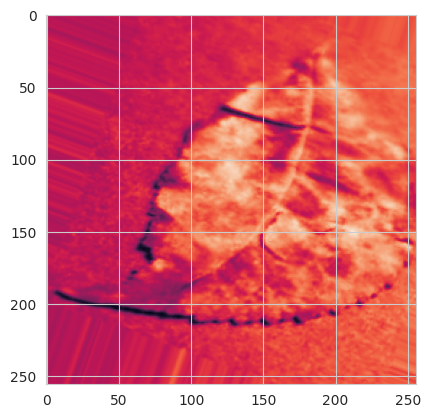

In [121]:
for _ in range(3):
    img, label = train_set_gray.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

* Test set

(25, 256, 256, 1)


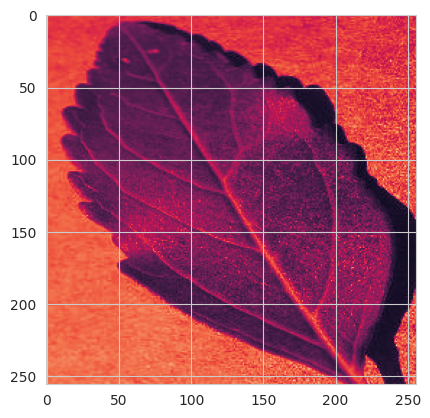

(25, 256, 256, 1)


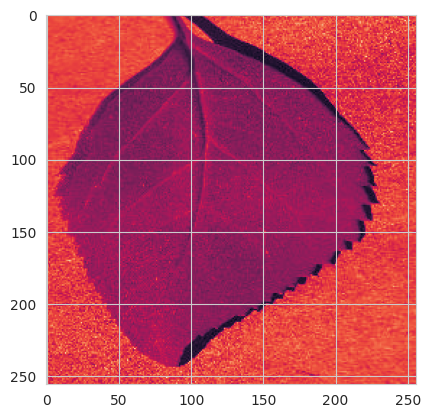

(25, 256, 256, 1)


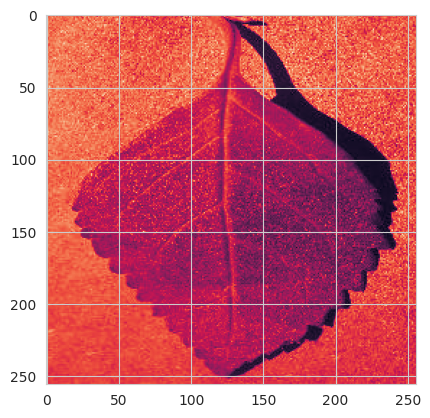

In [122]:
for _ in range(3):
    img, label = test_set_gray.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

* Validation set

(25, 256, 256, 1)


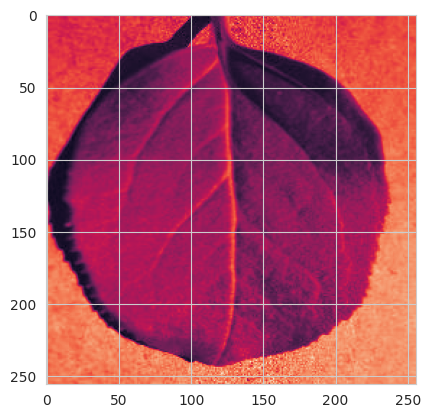

(25, 256, 256, 1)


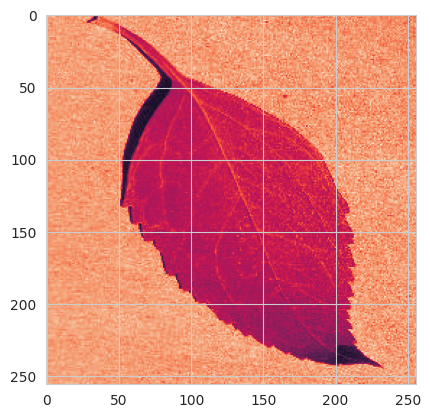

(25, 256, 256, 1)


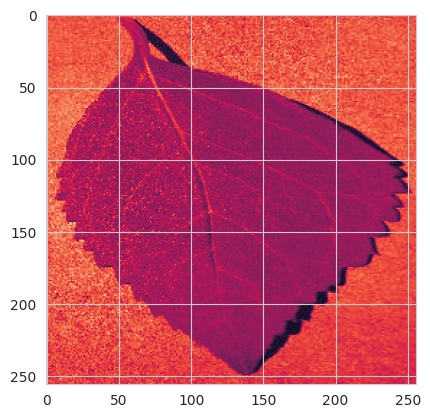

In [123]:
for _ in range(3):
    img, label = validation_set_gray.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()


* Save the augmented images as an pickle

In [125]:
joblib.dump(value=train_set_gray.class_indices,
            filename=f"{file_path_two}/class_indices.pkl")

['output/v2/class_indices.pkl']

---

## Creating the model for Grayscale data set

---

* importing necessary packages

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import initializers

* Creating The model
    * Based of the model for RGB Images

In [127]:
import tensorflow as tf
def create_tf_model_gray():
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

* Summary of the model

In [128]:
create_tf_model_gray().summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


* **Implementing early stopping**

In [129]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop_gray = EarlyStopping(monitor='val_loss', patience=3)

* **Fit model for training**

In [130]:
model = create_tf_model_gray()
model.fit(train_set_gray,
          epochs=25,
          steps_per_epoch=len(train_set_gray.classes) // batch_size,
          validation_data=validation_set_gray,
          callbacks=[early_stop_gray],
          verbose=1
          )

Epoch 1/25


ValueError: in user code:

    /workspace/.pip-modules/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /workspace/.pip-modules/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /workspace/.pip-modules/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /workspace/.pip-modules/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /workspace/.pip-modules/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /workspace/.pip-modules/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /workspace/.pip-modules/lib/python3.8/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /workspace/.pip-modules/lib/python3.8/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /workspace/.pip-modules/lib/python3.8/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /workspace/.pip-modules/lib/python3.8/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /workspace/.pip-modules/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /workspace/.pip-modules/lib/python3.8/site-packages/keras/losses.py:1809 binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    /workspace/.pip-modules/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /workspace/.pip-modules/lib/python3.8/site-packages/keras/backend.py:5000 binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /workspace/.pip-modules/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /workspace/.pip-modules/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:245 sigmoid_cross_entropy_with_logits_v2
        return sigmoid_cross_entropy_with_logits(
    /workspace/.pip-modules/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /workspace/.pip-modules/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:132 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 10) vs (None, 1))


# Push files to Repo